# Vilnius Appartments
## By Svajune Klimasauskaite

In [195]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
#from google.cloud import storage

%matplotlib inline

## Load Data



In [196]:
#Load flats
flat=pd.read_csv("https://raw.githubusercontent.com/vilnius/apartment-buildings/master/apartment_buildings_2019.csv", sep=';')
flat.head(2)

,id,adresas,namo_valdytojas,valdymo_forma,paskyrimo_pagrindas,administratoriaus_pabaigos_Data,paskirtis,uni_nr,bendr_plotas,naud_plotas,build_year,renov_metai,renovacijos_statusas,energ_naudingumo_klase,butu_skaicius,negyvenamuju_palapu_skaicius,korpusas,sklypo_plotas
0,1,A. Goštauto g. 2,286-oji gyvenamojo namo A.Goštauto g. 2/15 sav...,Bendrija,1995.02.02,NaN,Gyvenamoji (trys ir daugiau butų),1096-0010-4010,6607.43,4360.68,1960.0,NaN,Nerenovuotas,NaN,53.0,4.0,1A7p,0.00
1,2,A. Goštauto g. 3,DNSB NERIES VINGIS,Bendrija,2009.04.10,NaN,Gyvenamoji (trys ir daugiau butų),1095-7003-6016,4304.17,2771.57,1957.0,NaN,Nerenovuotas,NaN,38.0,14.0,1A5p,0.15


In [197]:
# Get rid of unnecessary columns
flat.drop(columns = ['namo_valdytojas', 'valdymo_forma', 'paskyrimo_pagrindas',
                    'administratoriaus_pabaigos_Data', 'uni_nr', 'korpusas'], inplace = True)

# Translate column names to english  
flat.rename(columns={'adresas':'street', 'paskirtis':'purpose',
                        'bendr_plotas':'area', 'naud_plotas':'area_useful',
                       'build_year':'year', 'renov_metai':'year_renov', 'renovacijos_statusas':'renov_status',
                       'energ_naudingumo_klase':'efficiency', 'butu_skaicius':'no_flats',
                       'negyvenamuju_palapu_skaicius':'not_living_flats','sklypo_plotas':'land',
                       }, inplace=True)
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
157,158,Gilužio g. 8,Gyvenamoji (trys ir daugiau butų),3294.40,2594.54,2002.0,NaN,Nerenovuotas,NaN,42.0,0.0,0.00
3850,3852,Kauno g. 6,Gyvenamoji (trys ir daugiau butų),2661.01,1796.17,1940.0,NaN,Nerenovuotas,F,23.0,0.0,0.00
2915,2917,Taikos g. 141,Gyvenamoji (trys ir daugiau butų),1391.07,1110.80,1985.0,NaN,Nerenovuotas,NaN,19.0,1.0,0.00
896,897,Gabijos g. 42,Gyvenamoji (trys ir daugiau butų),7503.10,4860.38,2013.0,NaN,Nerenovuotas,B,70.0,34.0,0.84
4449,4451,Vilniaus g. 47,Gyvenamoji (trys ir daugiau butų),1317.22,867.44,1940.0,NaN,Nerenovuotas,NaN,10.0,4.0,0.00


## Data Check

In [198]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6521 entries, 0 to 6520
Data columns (total 12 columns):
id                  6521 non-null int64
street              6521 non-null object
purpose             6518 non-null object
area                6519 non-null float64
area_useful         6519 non-null float64
year                6510 non-null float64
year_renov          289 non-null float64
renov_status        6466 non-null object
efficiency          1291 non-null object
no_flats            6519 non-null float64
not_living_flats    6510 non-null float64
land                6513 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 611.4+ KB


In [199]:
# Count null records
flat.isnull().sum()

id                     0
street                 0
purpose                3
area                   2
area_useful            2
year                  11
year_renov          6232
renov_status          55
efficiency          5230
no_flats               2
not_living_flats      11
land                   8
dtype: int64

In [200]:
# Count unique records
flat.nunique()

id                  6521
street              5993
purpose               15
area                6094
area_useful         5840
year                 106
year_renov            13
renov_status           6
efficiency             8
no_flats             170
not_living_flats      98
land                 132
dtype: int64

In [201]:
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
2195,2196,Verkių g. 110,Gyvenamoji (trys ir daugiau butų),107.27,98.55,1940.0,NaN,Nerenovuotas,NaN,3.0,0.0,0.00
3312,3314,Girulių g. 7,Gyvenamoji (trys ir daugiau butų),6149.58,5489.20,2007.0,NaN,Nerenovuotas,B,90.0,85.0,2.93
1990,1991,Taikos g. 160,Gyvenamoji (trys ir daugiau butų),1343.47,1118.27,1985.0,NaN,Nerenovuotas,NaN,20.0,0.0,0.00
3614,3616,Gerovės g. 47,Gyvenamoji (trys ir daugiau butų),1527.54,1241.09,1978.0,NaN,Nerenovuotas,NaN,22.0,0.0,0.00
2402,2403,Geležinio Vilko g. 17,Gyvenamoji (trys ir daugiau butų),4583.37,3832.90,1965.0,NaN,Nerenovuotas,E,81.0,0.0,0.00


## Data Cleaning and Augmentation

### Droping Empty Rows

In [202]:
flat[flat['year'].isnull() == True]

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
6490,6497,Santariškių g. 117,Gyvenamoji (trys ir daugiau butų),1833.48,1680.46,NaN,NaN,NaN,NaN,30.0,15.0,0.62
6491,6498,Santariškių g. 115,Gyvenamoji (trys ir daugiau butų),2340.29,2073.73,NaN,NaN,NaN,NaN,35.0,29.0,0.62
6496,6505,Sparno g. 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,6506,Naujininkų g. 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6514,6523,Stirnų g. 23,Gyvenamoji (trys ir daugiau butų),3479.44,2984.87,NaN,NaN,NaN,NaN,54.0,34.0,3479.44
6515,6524,Stumbrų g. 26B,Gyvenamoji (trys ir daugiau butų),3229.87,2852.10,NaN,NaN,NaN,NaN,54.0,13.0,0.68
6516,6525,Stumbrų g. 26,Gyvenamoji (trys ir daugiau butų),3991.43,3310.39,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6517,6526,Stirnų g. 21,Gyvenamoji (trys ir daugiau butų),3964.63,3327.61,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6518,6527,Stumbrų g. 26A,Gyvenamoji (trys ir daugiau butų),2855.18,2451.69,NaN,NaN,NaN,NaN,42.0,23.0,0.68
6519,6528,Linksmoji g. 139,NaN,5100.30,4422.15,NaN,NaN,NaN,NaN,79.0,67.0,0.31


In [203]:
flat.drop(index = [6496, 6497], inplace=True)
flat[flat['year'].isnull() == True]

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
6490,6497,Santariškių g. 117,Gyvenamoji (trys ir daugiau butų),1833.48,1680.46,NaN,NaN,NaN,NaN,30.0,15.0,0.62
6491,6498,Santariškių g. 115,Gyvenamoji (trys ir daugiau butų),2340.29,2073.73,NaN,NaN,NaN,NaN,35.0,29.0,0.62
6514,6523,Stirnų g. 23,Gyvenamoji (trys ir daugiau butų),3479.44,2984.87,NaN,NaN,NaN,NaN,54.0,34.0,3479.44
6515,6524,Stumbrų g. 26B,Gyvenamoji (trys ir daugiau butų),3229.87,2852.10,NaN,NaN,NaN,NaN,54.0,13.0,0.68
6516,6525,Stumbrų g. 26,Gyvenamoji (trys ir daugiau butų),3991.43,3310.39,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6517,6526,Stirnų g. 21,Gyvenamoji (trys ir daugiau butų),3964.63,3327.61,NaN,NaN,NaN,NaN,60.0,1.0,0.51
6518,6527,Stumbrų g. 26A,Gyvenamoji (trys ir daugiau butų),2855.18,2451.69,NaN,NaN,NaN,NaN,42.0,23.0,0.68
6519,6528,Linksmoji g. 139,NaN,5100.30,4422.15,NaN,NaN,NaN,NaN,79.0,67.0,0.31
6520,6529,M. K. Paco g. 19,Gyvenamoji (trys ir daugiau butų),3645.90,2607.64,NaN,NaN,NaN,NaN,36.0,26.0,0.24


### Split Street and House info

In [204]:
flat['house'] = flat['street'].str[::-1].str.split('.').str[0].str[::-1]
flat.sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land,house
2142,2143,Užusienio g. 28,Gyvenamoji (trys ir daugiau butų),208.68,208.68,1950.0,NaN,Nerenovuotas,NaN,3.0,0.0,0.13,28
2675,2677,V. Grybo g. 24,Gyvenamoji (trys ir daugiau butų),588.66,336.80,1958.0,NaN,Nerenovuotas,NaN,6.0,0.0,0.00,24
5766,5768,V. Šopeno 3B,Gyvenamoji (trys ir daugiau butų),1954.74,1344.48,1940.0,NaN,Nerenovuotas,NaN,24.0,1.0,0.00,Šopeno 3B
3333,3335,L. Zamenhofo g. 12,Gyvenamoji (trys ir daugiau butų),2507.30,2162.69,2005.0,NaN,Nerenovuotas,NaN,36.0,7.0,1.14,12
3490,3492,Laisvės pr. 113,Gyvenamoji (trys ir daugiau butų),4120.68,3244.80,1991.0,NaN,Nerenovuotas,NaN,60.0,0.0,0.00,113


In [207]:
flat['house2'].unique()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [206]:
house2 = []

for i in flat['house']:
    if 'kelias' in i:
        house2.append(flat['house'].str.split('kelias').str[-1])
    elif 'aikštė' in i:
        house2.append(flat['house'].str.split('aikštė').str[-1])
    else:
        house2.append(i)

flat['house2'] = house2

In [ ]:
flat['street'].str.split(' kelias ').str[-1]

In [ ]:
flat['house'].unique()

In [ ]:
flat['namo_nr'] = flat['adresas'].str.split('.')[-1]
# Code. Remove the link and reverse the string. 
rating = t_merge['text'].str.split('https:').str[0].str[::-1]
# Grap the first pattern 
rating = rating.str.extract('(\d+)/(\d+)')
# Store nto the rating format and do a back reverse
full_rating = (rating[0]+'/'+rating[1])
full_rating = full_rating.str[::-1]

### Flat Purpose

In [140]:
flat.purpose.unique()

array(['Gyvenamoji (trys ir daugiau butų)',
       'Gyvenamoji (įvairioms socialinėms grupėms)',
       'Gyvenamoji (vieno buto pastatai)', 'Prekybos\r\n',
       'Administracinė', 'Gyvenamoji (dviejų butų pastatas)',
       'Nenustatyta', 'Viešbučių', 'Sudegęs', 'Bendrabutis',
       'Gyvenamasis su visuomeninėmis patalpomis',
       'Prekybinis - administracinis pastatas su gyvenamomis patalpomis',
       'Daugiabutis gyvenamas namas/komercinė',
       'Gyvenamasis komercinis kompleksas', 'Dvibutis', nan], dtype=object)

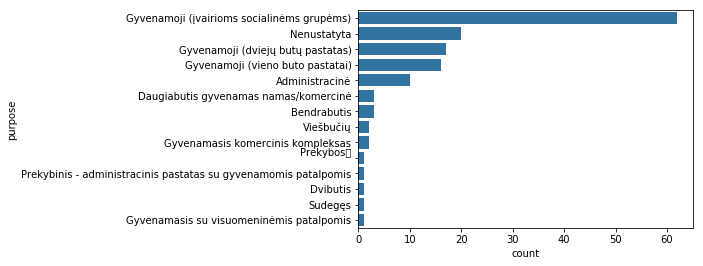

In [141]:
base_color=sb.color_palette()[0]
flat2 = flat[flat['purpose'] != 'Gyvenamoji (trys ir daugiau butų)']
order_rule=flat2['purpose'].value_counts().index
sb.countplot(data=flat2, y='purpose', color=base_color, order=order_rule);

In [142]:
flat[flat['purpose'] == 'Gyvenamoji (trys ir daugiau butų)']['id'].count()

6378

In [145]:
flat['purpose'].isnull().sum()

0

### Year

In [146]:
flat['year'].unique()

array([1960., 1957., 1940., 1938., 2006., 1955., 1959., 1953., 1972.,
       1996., 1995., 1994., 2008., 1901., 1961., 1958., 1974., 1968.,
       1975., 1963., 1964., 2001., 2002., 1967., 1966., 2007., 1970.,
       1971., 1969., 1980., 1984., 1986., 1985., 1981., 2013., 1997.,
       2009., 2000., 1993., 1989., 1982., 1977., 1983., 1965., 2004.,
       1973., 1979., 1952., 2012., 2015., 1987., 2003.,    0., 1962.,
       2005., 1976., 1978., 1998., 1923., 1999., 1944., 1950., 1990.,
       1988., 1991., 1954., 1903., 2014., 1951., 1992., 1956., 1912.,
       1934., 2010., 1935., 2016., 1937., 1911., 1933., 1930., 1928.,
       2011., 2017., 1931., 1932., 1916., 1947., 1939., 1936., 1913.,
       1948., 1922., 1910., 1946., 1929., 1914., 1941., 1905., 1942.,
       1920., 1949., 1924., 1927., 1915., 1908., 1926.,   nan])

In [147]:
flat['year'] = flat['year'].replace(0, np.nan)
flat['year'].unique()

array([1960., 1957., 1940., 1938., 2006., 1955., 1959., 1953., 1972.,
       1996., 1995., 1994., 2008., 1901., 1961., 1958., 1974., 1968.,
       1975., 1963., 1964., 2001., 2002., 1967., 1966., 2007., 1970.,
       1971., 1969., 1980., 1984., 1986., 1985., 1981., 2013., 1997.,
       2009., 2000., 1993., 1989., 1982., 1977., 1983., 1965., 2004.,
       1973., 1979., 1952., 2012., 2015., 1987., 2003.,   nan, 1962.,
       2005., 1976., 1978., 1998., 1923., 1999., 1944., 1950., 1990.,
       1988., 1991., 1954., 1903., 2014., 1951., 1992., 1956., 1912.,
       1934., 2010., 1935., 2016., 1937., 1911., 1933., 1930., 1928.,
       2011., 2017., 1931., 1932., 1916., 1947., 1939., 1936., 1913.,
       1948., 1922., 1910., 1946., 1929., 1914., 1941., 1905., 1942.,
       1920., 1949., 1924., 1927., 1915., 1908., 1926.])

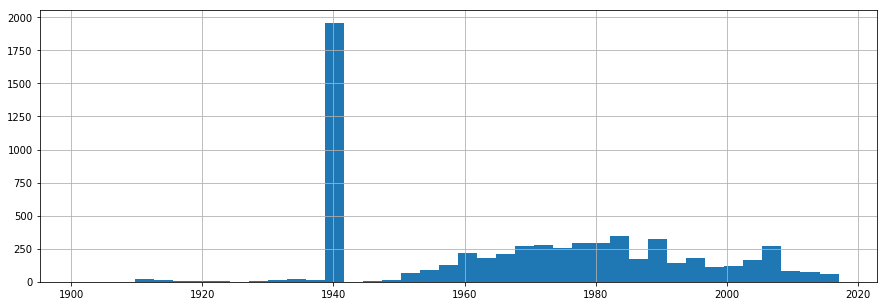

In [148]:
plt.figure(figsize = [15, 5]) 
flat['year'].hist(bins=40);

In [150]:
flat[flat['year'].isnull() == True].sample(5)

,id,street,purpose,area,area_useful,year,year_renov,renov_status,efficiency,no_flats,not_living_flats,land
2243,2244,Visorių Sodų 5-oji g. 7,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.0
2298,2299,Želvos g. 11A,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.0
5207,5209,Savanorių pr. 184,Gyvenamoji (trys ir daugiau butų),294.36,294.36,NaN,NaN,Nerenovuotas,NaN,6.0,0.0,0.0
2241,2242,Visorių Sodų 5-oji g. 14,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.0
1262,1263,Lentvario g. 12,Gyvenamoji (trys ir daugiau butų),0.00,0.00,NaN,NaN,Nerenovuotas,NaN,0.0,0.0,0.0


### Renovation Year

In [151]:
flat['year_renov'].unique()

array([  nan, 2017., 2016., 2007., 2006., 2010., 2008., 2009., 2015.,
       2005., 2000., 2011., 2014., 2013.])

In [152]:
flat['year_renov'] = flat['year_renov'].replace(0, np.nan)
flat['year_renov'].unique()

array([  nan, 2017., 2016., 2007., 2006., 2010., 2008., 2009., 2015.,
       2005., 2000., 2011., 2014., 2013.])

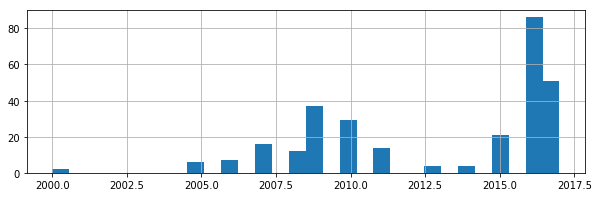

In [154]:
plt.figure(figsize = [10, 3]) 
flat['year_renov'].hist(bins = 30);

### Renovation Status

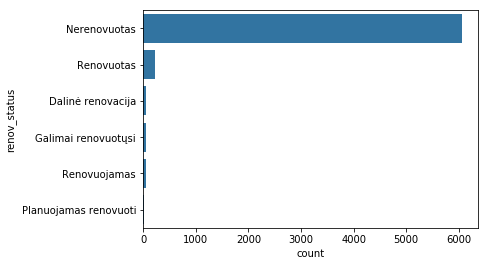

In [155]:
base_color=sb.color_palette()[0]
order_rule=flat['renov_status'].value_counts().index
sb.countplot(data=flat, y='renov_status', color=base_color, order=order_rule);

In [156]:
flat['renov_status'].isnull().sum()

53

In [157]:
flat['renov_status'].replace(np.nan, 'Nerenovuotas', inplace = True, regex = True)
flat['renov_status'].isnull().sum()

0

In [158]:
flat['renov_status'].unique()

array(['Nerenovuotas', 'Renovuotas', 'Renovuojamas', 'Dalinė renovacija',
       'Galimai renovuotųsi', 'Planuojamas renovuoti'], dtype=object)

### House Efficiency

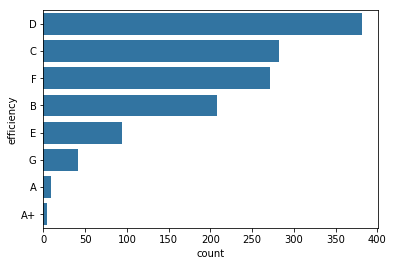

In [159]:
base_color=sb.color_palette()[0]
order_rule=flat['efficiency'].value_counts().index
sb.countplot(data=flat, y='efficiency', color=base_color, order=order_rule);

In [160]:
flat['efficiency'].isnull().mean()

0.8019634913330266

### Number of Flats in the Building

In [161]:
print('Number of records without information: {}'.format(flat['no_flats'].isnull().sum()))
print('Total number of appartments: {}'.format(flat['no_flats'].sum()))

Number of records without information: 0
Total number of appartments: 214450.0


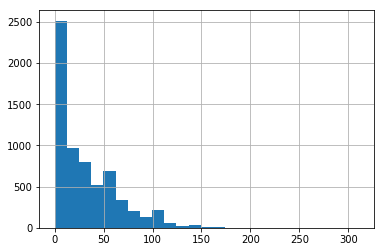

In [162]:
flat['no_flats'].hist(bins = 25);

In [164]:
flat['no_flats'].isnull().sum()

0

### Number of Not Occupied Flats

In [165]:
flat['not_living_flats'].isnull().sum()

9

In [166]:
flat['not_living_flats'].replace(np.nan, 0, inplace = True, regex = True)
flat['not_living_flats'].isnull().sum()

0

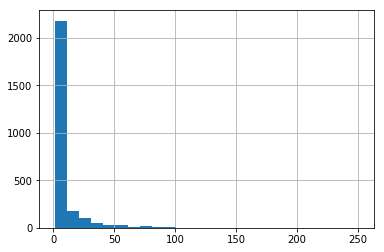

In [167]:
flat[flat['not_living_flats'] != 0]['not_living_flats'].hist(bins = 25);

### Land

In [168]:
flat['land'].isnull().sum()

6

In [169]:
flat['land'].replace(np.nan, 0, inplace = True)
flat['land'].isnull().sum()

0

In [170]:
flat['land'].describe()

count     6519.000000
mean        96.844699
std       1939.744334
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      39190.000000
Name: land, dtype: float64

## Quality Check

In [171]:
flat.isnull().sum()

id                     0
street                 0
purpose                0
area                   0
area_useful            0
year                  89
year_renov          6230
renov_status           0
efficiency          5228
no_flats               0
not_living_flats       0
land                   0
dtype: int64

## Save the File

In [ ]:
#df.to_csv(neigh, '⁨Google Drive⁩/My Drive⁩/Vilniaus duomenys⁩/Vilnius.csv', sep=';')